In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('D:/Data Analysis/Files/IMDbMovies-Clean.csv')
df.columns

Index(['Title', 'Summary', 'Director', 'Writer', 'Main Genres',
       'Motion Picture Rating', 'Release Year', 'Runtime (Minutes)',
       'Rating (Out of 10)', 'Number of Ratings (in thousands)',
       'Budget (in millions)', 'Gross in US & Canada (in millions)',
       'Gross worldwide (in millions)', 'Opening Weekend in US & Canada',
       'Gross Opening Weekend (in millions)'],
      dtype='object')

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Title                                9083 non-null   object 
 1   Summary                              9083 non-null   object 
 2   Director                             9052 non-null   object 
 3   Writer                               8759 non-null   object 
 4   Main Genres                          9076 non-null   object 
 5   Motion Picture Rating                8285 non-null   object 
 6   Release Year                         9076 non-null   float64
 7   Runtime (Minutes)                    8918 non-null   float64
 8   Rating (Out of 10)                   8813 non-null   float64
 9   Number of Ratings (in thousands)     8813 non-null   float64
 10  Budget (in millions)                 5879 non-null   float64
 11  Gross in US & Canada (in milli

Fixing the Years

In [5]:
df = df.dropna(subset=["Release Year"]) # Dropped the NaN value rows of the column
df['Release Year'] = df['Release Year'].astype(int) # Changed the data type

Fixing the Date Logic

In [6]:
df['Opening Weekend in US & Canada'] = pd.to_datetime(df['Opening Weekend in US & Canada'],
                                                        format='%m.%d.%Y')
# We formatted Opening Weekend... column to datetime format and we gave the formatting instructions

Splitting Genres to 'Primary Genre'

In [7]:
df = df.rename(columns={'Main Genres' : 'Genres'}) # We renamed the column for easier use
df['Genres'] = df["Genres"].fillna('Uknown') # We filled NaNs with 'Uknown'
# because split in labda doesn't work with NaNs or Zeroes
df['Primary Genre'] = df['Genres'].apply(lambda x: x.split(',')[0])
# We created a new Column 'Primary Genre as we took the first value in 'Genres' column
# We used lambda for doing it with each row

# Analyzing

The ROI (Return on Investment)

In [8]:
df["Profit"] = df['Gross worldwide (in millions)'] - df['Budget (in millions)']
top5 = df.sort_values(by='Profit', ascending=False).head(5)
top5

,Title,Summary,Director,Writer,Genres,Motion Picture Rating,Release Year,Runtime (Minutes),Rating (Out of 10),Number of Ratings (in thousands),Budget (in millions),Gross in US & Canada (in millions),Gross worldwide (in millions),Opening Weekend in US & Canada,Gross Opening Weekend (in millions),Primary Genre,Profit
5066,Avatar,A paraplegic Marine dispatched to the moon Pan...,James Cameron,James Cameron,"Action,Adventure,Fantasy",PG-13,2009,162.0,7.9,1400.0,237.0,785.222,2923.706,2009-12-20,77.025,Action,2686.706
1272,Avengers: Endgame,After the devastating events of Avengers: Infi...,"Anthony Russo,Joe Russo","Stephen McFeely,Stan Lee,Christopher Markus","Action,Adventure,Drama",PG-13,2019,181.0,8.4,1200.0,356.0,858.373,2799.439,2019-04-28,357.115,Action,2443.439
727,Titanic,A seventeen-year-old aristocrat falls in love ...,James Cameron,James Cameron,"Drama,Romance",PG-13,1997,194.0,7.9,1300.0,200.0,674.293,2264.743,1997-12-21,28.638,Drama,2064.743
1249,Avatar: The Way of Water,Jake Sully lives with his newfound family form...,James Cameron,"Amanda Silver,James Cameron,Rick Jaffa","Action,Adventure,Fantasy",PG-13,2022,192.0,7.6,469.0,350.0,684.076,2320.250,2022-12-18,134.100,Action,1970.250
118,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",J.J. Abrams,"J.J. Abrams,Michael Arndt,Lawrence Kasdan","Action,Adventure,Sci-Fi",PG-13,2015,138.0,7.8,962.0,245.0,936.662,2071.310,2015-12-20,247.967,Action,1826.310


The most successful directors

In [9]:
top_directors = df.groupby('Director')['Gross worldwide (in millions)'].sum().sort_values(ascending=False)
top_directors.head(5)

Director
Steven Spielberg    10751.595
James Cameron        8707.893
Peter Jackson        6646.548
Michael Bay          6503.995
David Yates          6439.672
Name: Gross worldwide (in millions), dtype: float64

Looking for Garbage movies with unrealistic Budget

In [10]:
# Sorting by Budget Descending
garbage_hunt = df.sort_values(by='Budget (in millions)', ascending=False)

print(garbage_hunt[['Title', 'Budget (in millions)', 'Release Year']].head(10))

                                Title  Budget (in millions)  Release Year
557              The Name of the Rose               30000.0          1986
3716                         Alienoid               30000.0          2022
7017                        Sewu Dino               18000.0          2023
7163                 The Great Battle               15000.0          2018
3144                         The Host               12215.5          2006
5967             Project Wolf Hunting               12000.0          2022
6725                   The Handmaiden               10000.0          2016
264                    Train to Busan               10000.0          2016
5495  The Tale of The Princess Kaguya                5000.0          2013
4706                   Lady Vengeance                4200.0          2005


# Visualization


More budget = better ratings?

In [11]:
df = df[df["Budget (in millions)"] < 500]   # Keeping movies with only valid budget

In [12]:
plot_data = df.dropna(subset=['Budget (in millions)', 'Rating (Out of 10)'])
plot_data = plot_data[
    (plot_data['Budget (in millions)'] > 0) & 
    (plot_data['Budget (in millions)'] < 500)
]

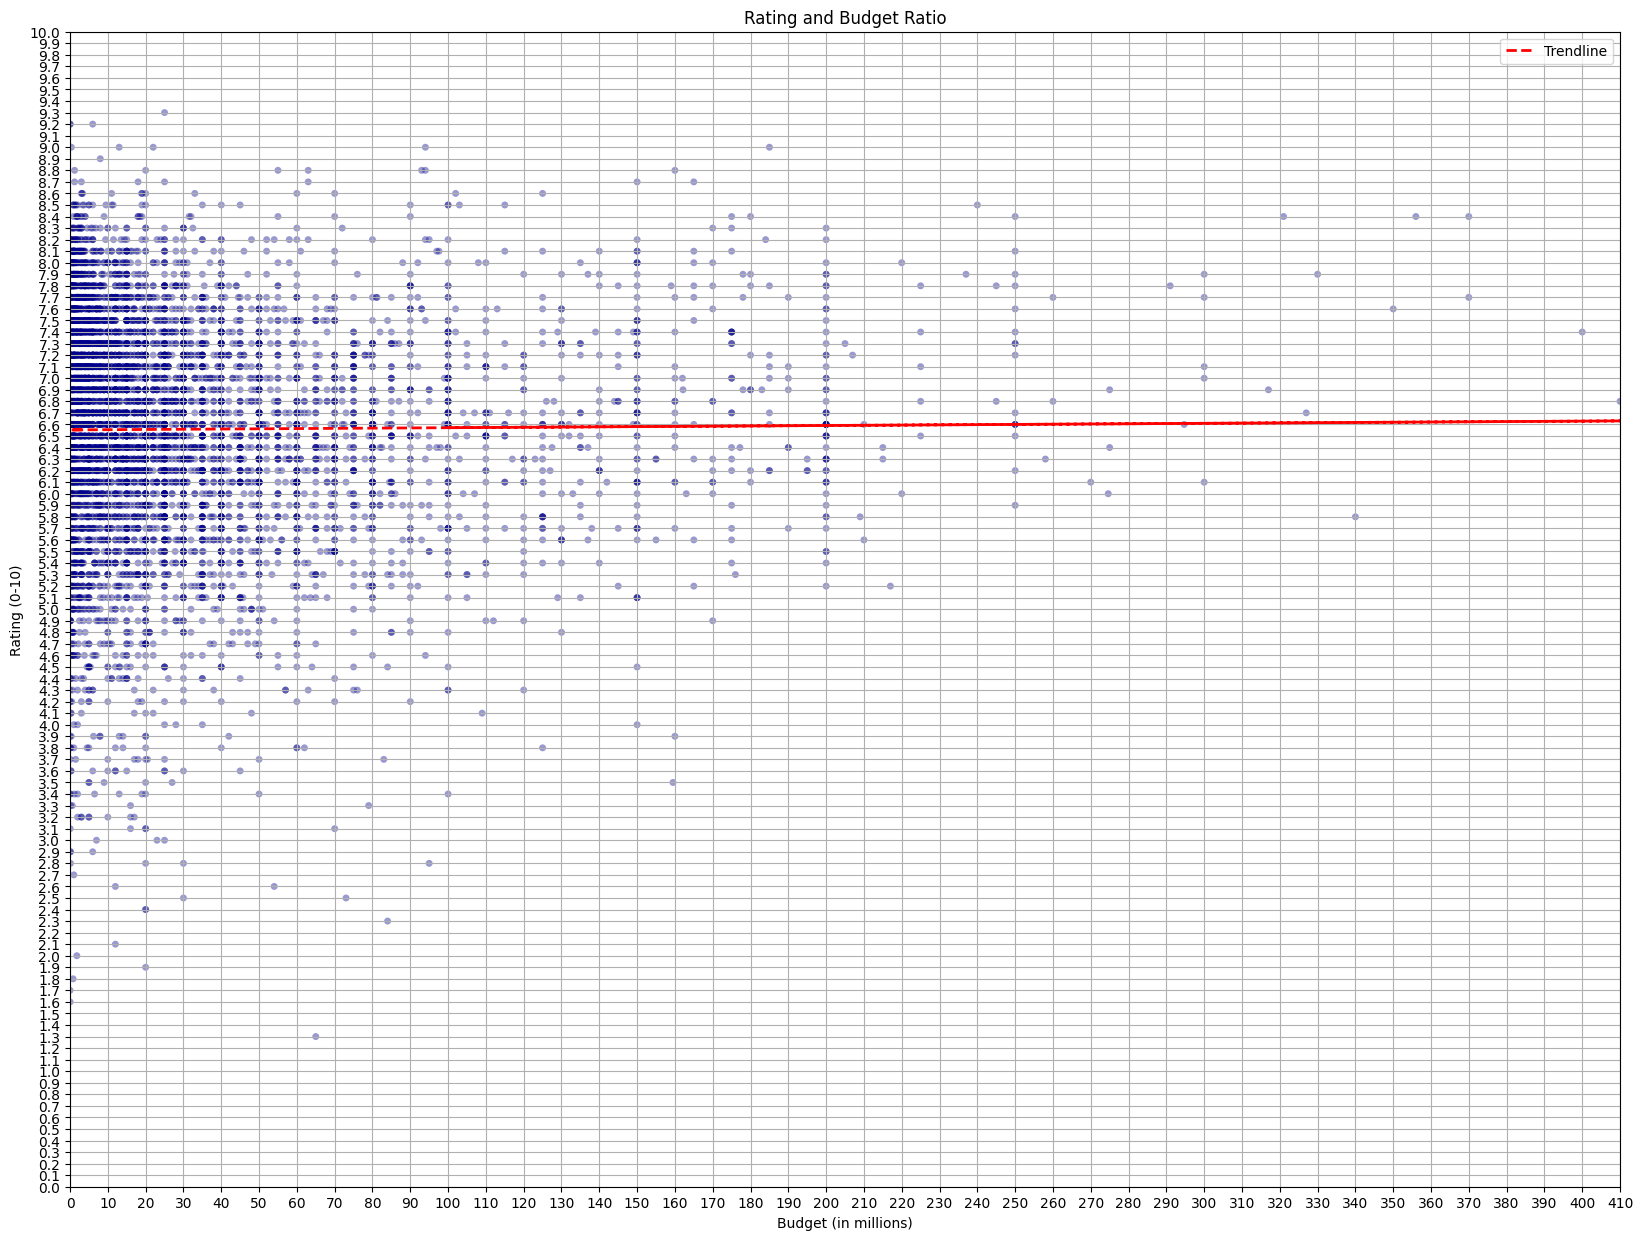

In [13]:
fig, ax = plt.subplots(figsize=(20,15
                                ))
ax.scatter(plot_data['Budget (in millions)'],
           plot_data['Rating (Out of 10)'],
           alpha=0.4,
           color = 'darkblue', 
           edgecolors='none',
           s=25
           )

z = np.polyfit(plot_data['Budget (in millions)'], plot_data['Rating (Out of 10)'], 1)
p = np.poly1d(z)
ax.plot(plot_data['Budget (in millions)'], p(plot_data['Budget (in millions)']), "r--", linewidth=2, label='Trendline')

ax.set_title("Rating and Budget Ratio")
ax.set_xlabel("Budget (in millions)")
ax.set_ylabel("Rating (0-10)")
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.set_xlim(0, 410)
ax.set_ylim(0, 10)
plt.grid(True)
plt.legend()


plt.show()

In [14]:
"""As you can see, some movies with very little budget got higher rating than those whose budget was 200+"""

'As you can see, some movies with very little budget got higher rating than those whose budget was 200+'

Are movies getting shorter over period?

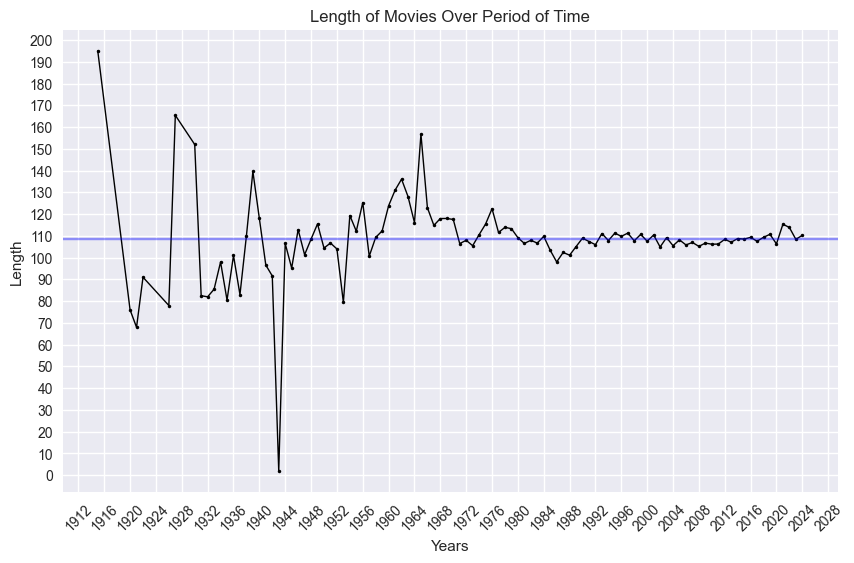

In [15]:
movies_length = df.groupby("Release Year")["Runtime (Minutes)"].mean()

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(movies_length.index, 
        movies_length.values, # type: ignore
        marker='.', 
        markersize=5,
        color = 'black', 
        linewidth = 1
        )

ax.set_title("Length of Movies Over Period of Time")
ax.set_xlabel("Years")
ax.set_ylabel("Length")
ax.axhline(y=movies_length.values.mean(), color='blue', alpha = 0.4) # type: ignore
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(rotation=45, size=10)
plt.grid(True)

plt.show()

In [16]:
""" First Movies appeared to be either long or short, during 1940s the production of movies dropped due to WW2.
    After that movies were longer than what is now, only after 80s we got what is called 'average length' with 110m"""

" First Movies appeared to be either long or short, during 1940s the production of movies dropped due to WW2.\n    After that movies were longer than what is now, only after 80s we got what is called 'average length' with 110m"

The most popular genre is Actions by Google and ChatGPT, is it really so?

In [17]:
popular_genre = df.groupby("Primary Genre")["Primary Genre"].count().sort_values(ascending=False)

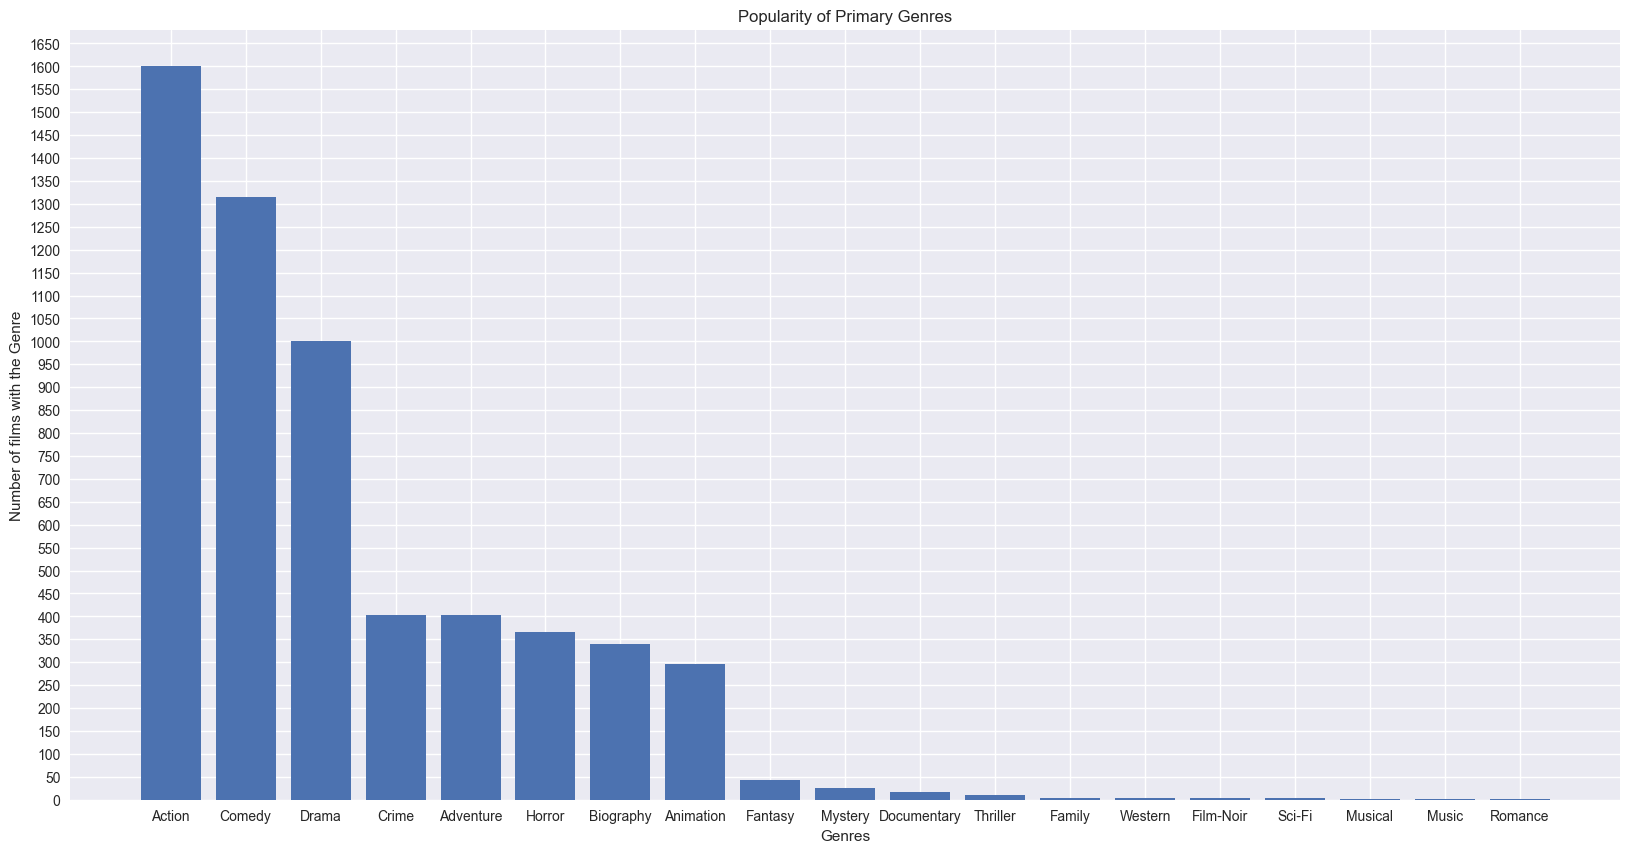

In [18]:
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(popular_genre.index, popular_genre.values)
ax.set_title("Popularity of Primary Genres")
ax.set_xlabel("Genres")
ax.set_ylabel("Number of films with the Genre")
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
